# Data: Past, Present, Future
# Lab 12: Fairness, accountability, transparency, privacy
    

### What has our technological monster wrought?

page-rank plus structural inequality plus racism equals....

anybody? 

Bueller?

anybody?

Racism!

![cover](https://ingram-nyu.imgix.net/covers/9781479837243.jpg?auto=format&w=298&fit=max&q=80&dpr=1.1)

## What is to be done?

Way back in the neolithic era of 2013, people come together think through Fairness, Accountability, and Transparency in Machine Learning (FATml now FAccT). 

### [Principles for Accountable Algorithms](http://www.fatml.org/resources/principles-for-accountable-algorithms)
>Automated decision making algorithms are now used throughout industry and government, underpinning many processes from dynamic pricing to employment practices to criminal sentencing. [...] Accountability in this context includes an obligation to report, explain, or justify algorithmic decision-making as well as mitigate any negative social impacts or potential harms.
[...]


+ Responsibility
>Make available externally visible avenues of redress for adverse individual or societal effects of an algorithmic decision system, and designate an internal role for the person who is responsible for the timely remedy of such issues.

+ Explainability
>Ensure that algorithmic decisions as well as any data driving those decisions can be explained to end-users and other stakeholders in non-technical terms.

+ Accuracy
>Identify, log, and articulate sources of error and uncertainty throughout the algorithm and its data sources so that expected and worst case implications can be understood and inform mitigation procedures.

+ Auditability
> Enable interested third parties to probe, understand, and review the behavior of the algorithm through disclosure of information that enables monitoring, checking, or criticism, including through provision of detailed documentation, technically suitable APIs, and permissive terms of use.

+ Fairness
> Ensure that algorithmic decisions do not create discriminatory or unjust impacts when comparing across different demographics (e.g. race, sex, etc).


# Fairness


## Two major doctrines in US law

### Disparate treatment

> one kind of unlawful discrimination in US labor law. In the United States, it means unequal behavior toward someone *because of* a protected characteristic (e.g. race or gender) under Title VII of the United States Civil Rights Act.  (h/t wikipedia)

Disparate treatment is a form of *procedural* justice, concerned with process. 

- discrimination built into a process

    - formal: explicitly using class membership, OR

    - intentional: *purposefully* attempting to discriminate without direct reference to class membership
        - use zipcodes rather than race *deliberately* to exclude from your country club
    
- equality of *opportunity*


## Disparate impact 

>in United States labor law refers to practices in employment, housing, and other areas that adversely affect one group of people of a protected characteristic more than another, even though rules applied by employers or landlords are formally neutral. Although the protected classes vary by statute, most federal civil rights laws protect based on race, color, religion, national origin, and sex as protected traits, and some laws include disability status and other traits as well. (h/t wikipedia)

Disparate impact is a form of *distributive* justice, concerned with the outcomes of processes.

- equality of outcome

- substantial justice

>disparate impact is not, in and of itself, illegal.  This is because disparate impact only becomes illegal if the employer cannot justify the employment practice causing the adverse impact as a "job related for the position in question and consistent with business necessity" (called the "business necessity defense"). (h/t wikipedia)


Let's look at a much studied example: the "adult" data set. Task is to predict whether person makes >$50K, in order to make decisions just as  giving credit or the like.
(https://archive.ics.uci.edu/ml/datasets/adult)

Paper examining: 

> Michael Feldman, Sorelle A. Friedler, John Moeller, Carlos Scheidegger, and Suresh Venkatasubramanian. Certifying and Removing Disparate Impact. Proceedings of the 21st ACM SIGKDD International Conference on Knowledge Discovery and Data Mining, 2015. (http://arxiv.org/abs/1412.3756)

Their awesome code: (https://github.com/algofairness/fairness-comparison/tree/master/algorithms)

Kaggle competition (https://www.kaggle.com/uciml/adult-census-income) 


In [0]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use
plt.rcParams['figure.figsize'] = (15, 5)

In [0]:
names = ['age','workclass', 'fnlwgt', 'education', 'education.num', 'marital.status','occupation', 'relationship','race','sex','capital.gain','capital.loss', 'hours.per.week', 'native.country','income']

In [0]:
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep=',', header=None, na_values="?", names=names)

In [0]:
data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [0]:
data.groupby(["race","income"]).size()

race                 income
 Amer-Indian-Eskimo   <=50K      275
                      >50K        36
 Asian-Pac-Islander   <=50K      763
                      >50K       276
 Black                <=50K     2737
                      >50K       387
 Other                <=50K      246
                      >50K        25
 White                <=50K    20699
                      >50K      7117
dtype: int64

In [0]:
data.groupby(["sex", "income"]).size()

sex      income
 Female   <=50K     9592
          >50K      1179
 Male     <=50K    15128
          >50K      6662
dtype: int64

In [0]:
data.groupby(["education", "income"]).size()

education      income
 10th           <=50K     871
                >50K       62
 11th           <=50K    1115
                >50K       60
 12th           <=50K     400
                >50K       33
 1st-4th        <=50K     162
                >50K        6
 5th-6th        <=50K     317
                >50K       16
 7th-8th        <=50K     606
                >50K       40
 9th            <=50K     487
                >50K       27
 Assoc-acdm     <=50K     802
                >50K      265
 Assoc-voc      <=50K    1021
                >50K      361
 Bachelors      <=50K    3134
                >50K     2221
 Doctorate      <=50K     107
                >50K      306
 HS-grad        <=50K    8826
                >50K     1675
 Masters        <=50K     764
                >50K      959
 Preschool      <=50K      51
 Prof-school    <=50K     153
                >50K      423
 Some-college   <=50K    5904
                >50K     1387
dtype: int64

### We're only going to want to train on some of the features.

In [0]:
features = ['age','workclass','education','marital.status','occupation','education.num','race','sex','relationship','capital.gain','capital.loss','native.country','income']

In [0]:
## have to do some data jujitsu
## converts strings to numerical values
## from https://www.kaggle.com/dewilliams/ml-adult-income

from sklearn.preprocessing import LabelEncoder

def preprocess_features(dframe):
    
    for column in dframe:
        enc = LabelEncoder()
        if(column not in ['age','education.num','fnlwgt','capital.gain','capital.loss','hours.per.week']):
            dframe[column] = enc.fit_transform(dframe[column])
    return dframe

In [0]:
keep_data=data
data=data[features]
#reduce our data to just the columns specified in `features`

In [0]:
data = preprocess_features(data)
#convert strings to numbers for easier computation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [0]:
data.head(10)

,age,workclass,education,marital.status,occupation,education.num,race,sex,relationship,capital.gain,capital.loss,native.country,income
0,39,7,9,4,1,13,4,1,1,2174,0,39,0
1,50,6,9,2,4,13,4,1,0,0,0,39,0
2,38,4,11,0,6,9,4,1,1,0,0,39,0
3,53,4,1,2,6,7,2,1,0,0,0,39,0
4,28,4,9,2,10,13,2,0,5,0,0,5,0
5,37,4,12,2,4,14,4,0,5,0,0,39,0
6,49,4,6,3,8,5,2,0,1,0,0,23,0
7,52,6,11,2,4,9,4,1,0,0,0,39,1
8,31,4,12,4,10,14,4,0,1,14084,0,39,1
9,42,4,9,2,4,13,4,1,0,5178,0,39,1


In [0]:
# works better if extract from pandas dataframe
# separate the existing classification (the diagnosis) from the features tested
# this should be a familiar split into X and y, what we want to predict
data_array=data.values
y = data['income']
X = data.drop('income', axis=1)

In [0]:
#just copying technique we saw in earlier lab
#load classifier

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

#divide into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

# train the classifier
dt = DecisionTreeClassifier() #set up classifier, with all **default** values
clf=dt.fit(X_train, y_train) #fit on training data

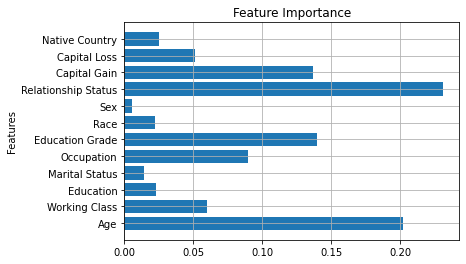

In [0]:
# display the relative importance of each attribute
relval = clf.feature_importances_

# horizontal bar plot of feature importance
pos = np.arange(12) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("")
plt.ylabel("Features")
plt.yticks(pos, ('Age','Working Class','Education','Marital Status','Occupation','Education Grade','Race','Sex','Relationship Status','Capital Gain','Capital Loss','Native Country'))
plt.grid(True)

In case you're wondering, check this out: https://medium.com/the-artificial-impostor/feature-importance-measures-for-tree-models-part-i-47f187c1a2c3

# What have we trained the decision tree to to do?


# What sorts of fairness is this likely to fail?

In [0]:
X_test.head(10)

,age,workclass,education,marital.status,occupation,education.num,race,sex,relationship,capital.gain,capital.loss,native.country
14160,27,4,15,0,1,10,4,0,1,0,0,39
27048,45,7,11,2,4,9,4,0,5,0,0,39
28868,29,4,9,2,4,13,2,1,0,0,0,39
5667,30,4,9,4,7,13,4,0,1,0,0,39
7827,29,6,15,0,3,10,4,1,1,2202,0,39
15382,51,4,12,2,10,14,4,1,0,0,0,39
4641,58,6,11,2,4,9,4,1,0,15024,0,39
8943,22,4,11,4,1,9,3,0,1,0,0,39
216,50,4,7,0,12,12,4,0,1,0,0,39
5121,50,4,11,2,3,9,4,1,0,3103,0,39


Now let's pick out just all the rows with sex = 1. Note the syntax and especially the double = (==) 

In [0]:
X_test[X_test["sex"]==1]

,age,workclass,education,marital.status,occupation,education.num,race,sex,relationship,capital.gain,capital.loss,native.country
28868,29,4,9,2,4,13,2,1,0,0,0,39
7827,29,6,15,0,3,10,4,1,1,2202,0,39
15382,51,4,12,2,10,14,4,1,0,0,0,39
4641,58,6,11,2,4,9,4,1,0,15024,0,39
5121,50,4,11,2,3,9,4,1,0,3103,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...
30332,39,4,11,5,7,9,2,1,1,2176,0,39
23712,56,4,9,2,1,13,4,1,0,0,0,39
14305,25,4,12,4,1,14,4,1,3,0,0,39
23041,34,4,15,2,13,10,4,1,0,3103,0,39


In [0]:
clf.predict(X_test).mean()

0.23230737732887463

In [0]:
clf.predict(X_test[X_test["sex"]==0]).mean()

0.11163846471316549

In [0]:
clf.predict(X_test[X_test["sex"]==1]).mean()

0.2919343326195575

In [0]:
clf.predict(X_test[X_test["race"]==0]).mean()

0.20270270270270271

In [0]:
clf.predict(X_test[X_test["race"]==1]).mean()

0.2694063926940639

In [0]:
for i in range(4):
    print(clf.predict(X_test[X_test["race"]==i]).mean())

0.20270270270270271
0.2694063926940639
0.1346578366445916
0.1322314049586777


# Disparate impact operationalized as "80-20 rule"


Look at *ratio* of impact of a procedure. 

If hire 20 women for every 50 men, ratio is 20/50 which equals .4. 

40% < 80%

Therefore, 

hiring practices have disparate impact *even if there is no deliberate discrimination using protected attributes*

**Still can be 20% discriminated against!!**

Take a minute to look at the legal implementation of this as [The 80% Rule](https://en.wikipedia.org/wiki/Disparate_impact#The_80%_rule) (in Wikipedia)




## What if we rebuilt our classifier without ever looking at legally protected attributes?

### Don't let our classifier use the features race and sex.

Those are protected attributes with which we cannot discriminate *intentionally*.

In [0]:
protected_attributes=['race', 'sex']

In [0]:
X_protected = data.drop(protected_attributes, axis=1)

In [0]:
#train anew

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_protected, y, test_size=0.45, random_state=42)

dt = DecisionTreeClassifier() #set up classifier, with all **default** values
clf=dt.fit(X_train, y_train) #fit on training data

In [0]:
clf.predict(X_test).mean()

0.24008735412543505

In [0]:
clf.predict(X_test[X["sex"]==0]).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.10647957078002476

In [0]:
clf.predict(X_test[X["sex"]==1]).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.3061078821250127

## What sort of *fairness* does this fail?


# The limitations of Fairness, accountability, transparency 

### The ["seductive diversion"](https://medium.com/s/story/the-seductive-diversion-of-solving-bias-in-artificial-intelligence-890df5e5ef53) of fairness

>Serious thinkers in academia and business have swarmed to the A.I. bias problem, eager to tweak and improve the data and algorithms that drive artificial intelligence. They’ve latched onto fairness as the objective, obsessing over competing constructs of the term that can be rendered in measurable, mathematical form. If the hunt for a science of computational fairness was restricted to engineers, it would be one thing. But given our contemporary exaltation and deference to technologists, it has limited the entire imagination of ethics, law, and the media as well.

...

>In short, the preoccupation with narrow computational puzzles distracts us from the far more important issue of the colossal asymmetry between societal cost and private gain in the rollout of automated systems. It also denies us the possibility of asking: Should we be building these systems at all?

-- Julia Powles and Helen Nussembaum

![powles](https://cdn-images-1.medium.com/max/2000/1*cgcqBdxRpPIzhJ0lbQB81g.png)


### Transparency

### ripped from the headlines

Let's consider the following proposed [legislation](https://www.scribd.com/document/405606873/Detour-Act-Final):

>UNFAIR AND DECEPTIVE ACTS AND PRACTICES RELATING TO THE MANIPULATION OF USER INTERFACES.

>(a) CONDUCT PROHIBITED

>(1) IN GENERAL

>It shall be unlawful for any large online operator—

>(A) to design, modify, or manipulate a user interface with the purpose or substantial effect of obscuring, subverting, or impairing user autonomy, decision-making, or choice to obtain consent or user data; 

>(B) to subdivide or segment consumers of online services into groups for the purposes of behavioral or psychological experiments or studies, except with the informed consent of each user involved; 

[....]

Introduced by U.S. Sens. Mark R. Warner (D-VA) and Deb Fischer (R-NE)


You are the CEO of Rent-Seekers-R-US, LLC, and it's time to optimize your privacy policies and user interface to ensure that users are maximally assured of their privacy while enabling you to monetize your data collection, both for your immediate use and for sale or exchange with third parties.

So let's get <s>evil</s> monetizing. 

Let's find some models.

Let's look at some privacy and data collection policies:

+ What kinds of data are being collected? How many different kinds of data?
+ What service or feature is enabled by the data they are collecting? Why are they collecting it in the first place?
+ Who else is given access to that data? How are they using it?
+ Can you get access to your own data?
+ What do they have to do if they change their policies?

Let's start with *Slack*, which is surely being provided for us to use for free out of the goodness of the investors' hearts.

https://slack.com/privacy-policy

or that of Zoom:

https://zoom.us/privacy

or your favorite on-line service.

And most crucially, *how* does the presentation of the policy potentially *obfuscate* answers to these questions.

Now go on the big scary open web and find examples of egregious legal language or user interface ("UX" for the cogniscenti) in the slack.

Now, can you examples where the policies sound fairly innocuous until one is equipped with a better understanding of current technologies? 

## Accountability

Recall that our opening reading from Wallach was the 1st "FAT" workshop and the "A" is for Accountability. Last week we mentioned that Accountability falls outside the definition of ethics but certainly describes the design for ethics -- e.g., the interaction design of the IRB process in which funding for research is tied to a research review process. 

Another example of ensuring accountability is in law, as we will discuss in Week 14. For example, within the EU's GDPR, Accountability is one of their principles:

According to https://edps.europa.eu/data-protection/our-work/subjects/accountability_en :

> Accountability is a common principle for organisations across many disciplines; the principle embodies that organisations live up to expectations for instance in the delivery of their products and their behaviour towards those they interact with. The General Data Protection Regulation (GDPR) integrates accountability as a principle which requires that organisations put in place appropriate technical and organisational measures and be able to demonstrate what they did and its effectiveness when requested.

> Organisations, and not Data Protection Authorities, must demonstrate that they are compliant with the law.  Such measures include: adequate documentation on what personal data are processed, how, to what purpose, how long;  documented processes and procedures aiming at tackling data protection issues at an early state when building information systems or responding to a data breach; the presence of a Data Protection Officer that be integrated in the organisation planning and operations etc.




####  [Principles for Accountable Algorithms](http://www.fatml.org/resources/principles-for-accountable-algorithms)
>Automated decision making algorithms are now used throughout industry and government, underpinning many processes from dynamic pricing to employment practices to criminal sentencing. . . . Accountability in this context includes an obligation to report, explain, or justify algorithmic decision-making as well as mitigate any negative social impacts or potential harms.  

What do you think of this definition? Does it need more or less? What does it need? Compare with the proposed legislation above? What might you do differently?

# Technical approaches to privacy
## k-anonymity

[K-anonymity](http://latanyasweeney.org/work/kanonymity.html)
> Problem Statement: Given person-specific field-structured data, produce a release of the data with scientific guarantees that the individuals who are the subjects of the data cannot be reidentified while the data remain practically useful.

> Description: [....] A release [of a dataset] provides k-anonymity if the data for each person cannot be distinguished from at least k-1 individuals whose data also appears in the release.

![diagram](http://latanyasweeney.org/work/kanonymity.jpg)

For the paper and more formal definition, see https://dataprivacylab.org/dataprivacy/projects/kanonymity/kanonymity.pdf



## a little more

The basic concern is this:

a bunch of fields of data that are each innocuous by themselves (non-identifiers)

yields in many cases

a row that serves for practical purposes as an identifier that uniquely identifies someone even in a large data set


## What's our "attack"

Identify individuals via attribute combinations (e.g. age, gender, zip code and weight)

## An example, back to our data set from earlier



In [0]:
data=keep_data #back to our unprocessed data
data[(data['capital.gain']>20000) & (data['capital.gain']<99999)]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
534,67,Private,231559,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,48,United-States,>50K
704,46,Private,295566,Doctorate,16,Divorced,Prof-specialty,Unmarried,White,Female,25236,0,65,United-States,>50K
1378,65,Private,198766,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,20051,0,40,United-States,>50K
1562,75,?,111177,Bachelors,13,Widowed,?,Not-in-family,White,Female,25124,0,16,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29892,51,Private,673764,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,27828,0,40,United-States,>50K
30788,67,Self-emp-not-inc,191380,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,25,United-States,>50K
30815,54,Self-emp-not-inc,28186,Bachelors,13,Divorced,Farming-fishing,Not-in-family,White,Male,27828,0,50,United-States,>50K
32198,67,Self-emp-inc,182581,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,20,United-States,>50K


In [0]:
data[(data['capital.gain']>20000) & (data['capital.gain']<99999) & (data['age']<35)]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
4568,18,Private,301948,HS-grad,9,Never-married,Protective-serv,Own-child,White,Male,34095,0,3,United-States,<=50K
6420,34,Private,50276,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,27828,0,40,United-States,>50K
6433,27,Private,211032,Preschool,1,Married-civ-spouse,Farming-fishing,Other-relative,White,Male,41310,0,24,Mexico,<=50K
6535,25,Private,169905,Assoc-voc,11,Never-married,Sales,Not-in-family,White,Male,27828,0,40,United-States,>50K
7186,19,Private,188815,HS-grad,9,Never-married,Other-service,Own-child,White,Female,34095,0,20,United-States,<=50K
7385,25,Private,102476,Bachelors,13,Never-married,Farming-fishing,Own-child,White,Male,27828,0,50,United-States,>50K
17039,20,?,273701,Some-college,10,Never-married,?,Other-relative,Black,Male,34095,0,10,United-States,<=50K
21482,30,Private,116138,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,27828,0,60,United-States,>50K
24297,32,Private,170154,Assoc-acdm,12,Separated,Exec-managerial,Unmarried,White,Female,25236,0,50,United-States,>50K


Given the combination of distinct occupations, race, etc., it may well be possible to identify at least some of these people from the data set.

Remember the definition of k-anonymity:
> A release [of a dataset] provides k-anonymity if the data for each person cannot be distinguished from at least k-1 individuals whose data also appears in the release.

So to achieve k-anonymity we need deliberately to alter the dataset to make k rows indistinguishable.

Ideally, we'd be preserving some of the value of the data set for scientific or legal analysis.

So what can we do?

We could drop a column entirely.

In [0]:
data_k=data.drop("race", axis=1)

In [0]:
data_k.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


We would gain something in privacy but at the expense of being able to do work with race, say in proving discrimination. 

So often we change individual fields such as age into bands of ages.

Instead of 1-99, we might replace the age values with "<30" and ">35" or the like.

To do this, we write a function that creates two bands and then use the `map` command to apply it to every row in our data set.

In [0]:
def age_generalization(age):
    if age < 35:
        return 'Avocado toast'
    else:
        return 'Ok boomer'

#then apply this function to every row using the map function--a very powerful tool

data.age = data.age.map(age_generalization)


In [0]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,Ok boomer,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Ok boomer,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Ok boomer,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Ok boomer,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Avocado toast,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Avocado toast,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,Ok boomer,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,Ok boomer,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,Avocado toast,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Now it's *your turn*. Transform one of the columns into something less revealing by changing the quasi-identifier attributes of rows into aggregate quantities. 

You might turn the capital gains column into something marking whether the person has more or less than the mean or median capital gains, for example.

For the categorical rows, means won't make sense, so it's best to combine them into groups, for example, "employment-group: [self-employed, employee, worker]" rather than retaining the three separate fields.


Put them in the slack.

There's no perfect algorithm for producing the optimal k-anonymous dataset--it's a hard (NP) problem. But there are various algorithmic approaches.



**bold text**
## *differential privacy*

k-anonymity introduces privacy by ensuring that no row -- and therefore no individual -- in a database is unique. Another way to introduce privacy is to introduce randomness, so that we can not be 100% positive (i.e., state with 100% probability) whether a certain person was even included in a dataset.

This was formalized in a paper from Microsoft Research, described by Cynthia Dwork and Penn CS professor (and Columbia alumnus!) Aaron Roth:

>“Differential privacy” describes a promise, made by a data holder, or curator, to a data subject: “You will not be affected, adversely or otherwise, by allowing your data to be used in any study or analysis, no matter what other studies, data sets, or information sources, are available.” At their best, differentially private database mechanisms can make confidential data widely available for accurate data analysis, without resorting to data clean rooms, data usage agreements, data protection plans, or restricted views." -- [Dwork and Roth ](https://www.cis.upenn.edu/~aaroth/Papers/privacybook.pdf) 2014 


Provides criterion for data collection and analysis, useful for examining different efforts to render data useful for research and for protecting privacy.

Quantify this trade off: privacy loss (given by $\epsilon$) vs. utility.

Choosing how much privacy to give up is a *policy* question, not a technical one. Differential privacy concerns how to know that a given policy choice about privacy has been adequately implemented in the creation and continuing use of a data set.

## How do this?

For each person's info we add to a data set, ask how much privacy is lost by adding that data. Then, based on our policy, we make some tough calls about how accurately to add the data.


### randomized response method

Suppose we wanted to collect data on illicit drug use. People answering our survey might well be suspicious that they could be identified. We tell them to flip a coin. If they get heads, they tell us the truth; if tails, they don't. We don't know but record the data they tell us.

By doing this we added noise to our data set that will make it difficult to pin drug use on any one person. But we can still do statistical analysis on the data set fruitfully.

This is but a trivial example of ways we can obfuscate data while retaining its utility by adding different sorts of noise to the data set. 








## Differential Privacy and the US Census

You will be hearing about differential privacy more and more in at least 1 context: the US Census

From [The Census Website Itself](https://www.census.gov/about/policies/privacy/statistical_safeguards/disclosure-avoidance-2020-census.html) :

> 2020 Census results will be protected using “differential privacy,” the new gold standard in data privacy protection. 

There's also a great [history inforgraphic](https://www2.census.gov/library/visualizations/2019/communications/history-privacy-protection.pdf) summarizing how privacy has gone from entirely absent to mandated
as part of "Title 13" (the 13th "chapter" of the 53 chapters defining federal law, aka "[United States Code](https://en.wikipedia.org/wiki/United_States_Code)")


However, this change is itself hotly contested, with, for example, arguments [for](https://www.nytimes.com/2018/12/05/upshot/to-reduce-privacy-risks-the-census-plans-to-report-less-accurate-data.html?searchResultPosition=1) and [against](https://www.nytimes.com/interactive/2020/02/06/opinion/census-algorithm-privacy.html) appearing in your local paper.


The Census itself is actively working on studying and communicating about it, including this helpful [deck](https://www2.census.gov/about/policies/2020-03-05-differential-privacy.pdf?#) from March 2020

Note that, just as "Privacy [was] Good Politics" in the 1970s, privacy has become good PR in the 2020s. Corporations including [Google](https://github.com/google/differential-privacy) [IBM](https://github.com/IBM/differential-privacy-library) and [the Facebook](https://github.com/facebookresearch/pytorch-dp) have released libraries on GitHub on how to perturb a dataset under differential privacy.

For example, take a moment to look at the IBM [example](https://github.com/IBM/differential-privacy-library/blob/master/notebooks/30seconds.ipynb) using the iris dataset. In this case, the classifier is "naive bayes" (a classifier which treats every feature as independent). The magic happens when noise is added to the [means](https://github.com/IBM/differential-privacy-library/blob/master/diffprivlib/models/naive_bayes.py#L187) and [variances](https://github.com/IBM/differential-privacy-library/blob/master/diffprivlib/models/naive_bayes.py#L188) of the assumed Gaussians for each type of iris, with more noise as epsilon is small.

Let's return though to the US Census Bureau. They too have a GitHub [account](https://github.com/uscensusbureau) with a "repo" (repository) for differential privacy. If you [check](https://github.com/uscensusbureau/census-dp) you'll see that it was "forked" from a repo from [Uma Desai](https://github.com/umadesai), data scientist at stitch fix who finished her undergraduate last year.




It's a great repo! It has a [glossary](https://github.com/uscensusbureau/census-dp/blob/master/notebooks/dp-glossary.ipynb) and plenty of examples, e.g., computing the noisy [mean](https://github.com/uscensusbureau/census-dp/blob/master/notebooks/dp-mean.ipynb) of a population, copied below:

### Generating a differentially private mean age of a population

To generate a differentially private mean age of a population, we first:
1. get an estimate of the total age (by adding [Laplace noise](https://en.wikipedia.org/wiki/Laplace_distribution#Probability_density_function))
2. get an estimate of the total population (by adding Laplace noise)
3. divide the two estimates

We can do this with the `dp_mean()` function below, which also calls `laplace_mech()`.

In [0]:
def laplace_mech(mu, epsilon, sensitivity=1.0):
    """Implementation of the Laplace Mechanism that adds Laplacian-distributed noise to a function.
  　
    Args:
      mu (float or numpy array): the true answer
      epsilon(int): the privacy budget
      sensitivity (float): the global sensitivity of the query
    """
    eps = epsilon/float(sensitivity)
    scale = 1/eps
    np_shape = np.shape(mu)
    shape = None if np_shape == () else np_shape
    z = np.random.laplace(0.0, scale=scale, size=shape)
    return mu + z

def dp_mean(eps_n, eps_d, top, bot, top_sen=100.0, bot_sen=1.0):
  noisy_top = laplace_mech(top, eps_n, top_sen)
  noisy_bot = laplace_mech(bot, eps_d, bot_sen)
  return noisy_top / noisy_bot

def mse(true_answer, function_name, *params):
  """true_answer is either a scalar or numpy array"""
  niterations = 100_000
  return sum(np.sum((true_answer - function_name(*params))**2) for x in range(niterations)) / float(niterations)

#### Data Processing

Let's start by importing the necessary libraries and loading the PUMS data.

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pa = pd.read_csv("https://raw.githubusercontent.com/data-ppf/data-ppf.github.io/master/dat/psam_p42_1000.csv")

Next, let's query the population we want to calculate the mean age of.

In [0]:
asn_pa = pa.query('RACASN==1 and PUMA==1000')

In [0]:
total_population=1000

#### Sensitivity Calculations

Now, let's calculate the values we need for `dp_mean()`. These inclue `total_age`, `total_population`, `age_sensitivity`, and `population_sensitivity`. 

The `age_sensitivity` is the maximum amount that the total age could change by the addition or removal of one record, which is the maximum allowable age, divided by two. Ages in the 2020 Census will be topcoded at 114.

In [0]:
total_age = asn_pa.AGEP.sum()
#total_population = float(asn_pa.AGEP.size)
total_population=1000
age_sensitivity = 114/2
population_sensitivity = 1.0

#### Privacy Budget [(Read More)](https://github.com/umadesai/census-dp/blob/master/notebooks/dp-budget.ipynb)

We also need to consider our privacy budget, `eps`. We can take `eps` and split it into two pieces: one for estimating the numerator (`eps_n`) and another for estimating the denominator (`eps_d`), so that `eps = eps_n + eps_d`.

The choice of `eps_n` and `eps_d` clearly affects accuracy. To optimize for accuracy, one can plug in different values for `eps_n` and `eps_d` to see how low you can make the estimated mse. However, you must make sure to use public data to do this. Do not refine values based on trials run on the protected data if you don't want to use additional budget. [(Read more about common DP mistakes)](https://github.com/umadesai/census-dp/blob/master/notebooks/dp-future.ipynb)

In [0]:

eps_n = 0.5 
eps_d = 0.5
assert eps_n + eps_d <= 1.0000000001, "eps_n + eps_d must be at most 1"

We can test these values and their accuracy with the `dp_mean()` and `mse()` functions, like below.

In [0]:
noisy_mean = dp_mean(eps_n, eps_d, total_age, total_population, age_sensitivity, population_sensitivity)
error = mse(total_age/total_population, dp_mean, eps_n, eps_d, total_age, total_population, age_sensitivity, population_sensitivity)
print("a noisy mean is ", noisy_mean)
print("mse is ", error)

a noisy mean is  -0.026426785315087204
mse is  0.0260429208199428


#### The Privacy-Accuracy Tradeoff

There is an inherent trade-oﬀ between privacy and data utility/accuracy discussed by many economists and statisticians. Broadly, the more information that is released (accurately), the better the data utility. However, this increases the risk of an attacker violating a person’s privacy. 

We want to be able to calculate the `noisy_mean` for different values of epsilon and calculate the average accuracy of the `noisy_mean` for each of these epsilons, so that we can quantify the accuracy-privacy trade off. The function below does this using L1 norm as the accuracy measure.

In [0]:
def avg_l1_mean(true_mean, eps, n=1000):
    total = 0
    for i in range(n):
        noisy_mean = dp_mean(eps/2, eps/2, total_age, total_population, age_sensitivity, population_sensitivity)
        accuracy = 1 - (np.linalg.norm([noisy_mean-true_mean], 1)/(2*1))
        total += accuracy
    return total/n

Let's use `avg_l1_mean()` to calculate the average accuracy of the noisy mean over a range of epsilon values. This function calculates the average over several runs of the `dp_mean()` function. Then let's visualize the output in an ROC curve that helps us understand the privacy-accuracy tradeoff.

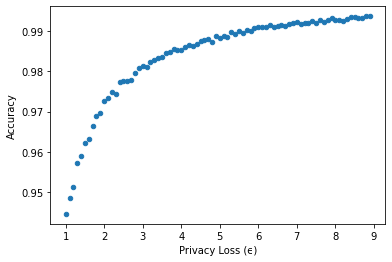

In [0]:
accuracy_df = pd.DataFrame()
eps_range = (np.arange(1.0,9.0,.1))
accuracy_df['Privacy Loss (ϵ)'] = eps_range
accuracy_df['Accuracy'] = [avg_l1_mean(total_age/total_population, x) for x in eps_range]
accuracy_df.plot.scatter('Privacy Loss (ϵ)', 'Accuracy')
plt.show()